# Visualization of the results

This notebook visualizes the results and plots samples of reconstructed pointclouds.


In [1]:
import json 
import glob
import torch
import pandas as pd
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format
from shapesynthesis.plotting import plot_recon_2d, plot_recon_3d

In [10]:
def model_to_cate(model):
    name = model.split("_")[-1]
    return name.title()


def model_to_modelname(model):
    name_list = model.split("_")[:-1]
    name = " ".join(name_list)
    return name.title()

def model_to_modelname_rendered(model):
    name_list = model.split("_")[:-4]
    name = " ".join(name_list)
    return name.title()


def visualize_2d_model(model,num_pc=5):
    recon_pcs = torch.load(f'./results/{model}/reconstructions.pt').cpu().detach().squeeze().numpy()
    reference_pcs = torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_2d(recon_pcs=recon_pcs[:num_pc],ref_pcs=reference_pcs[:num_pc],num_pc=num_pc)

def visualize_2d_genmodel(model,num_pc=5):
    recon_pcs = torch.load(f'./results/{model}/samples.pt').cpu().detach().squeeze().numpy()
    reference_pcs = torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_2d(recon_pcs=recon_pcs[:num_pc],ref_pcs=reference_pcs[:num_pc],num_pc=num_pc)


def visualize_3d_model(model,scale=1.0,num_pc:int=5,offset=0):
    recon_pcs = scale*torch.load(f'../results/{model}/reconstructions.pt').cpu().detach().squeeze().numpy()
    reference_pcs = scale*torch.load(f'../results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc,offset=offset)

def visualize_3d_genmodel(model,scale=1.0,num_pc:int=5,offset:int=0):
    recon_pcs = scale*torch.load(f'./results/{model}/samples.pt').cpu().detach().squeeze().numpy()
    reference_pcs = scale*torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc,offset=offset)


def visualize_2d_rendered(folder,ectsize,num_pc=5):
    recon_pcs = torch.load(f'./results/{folder}/reconstructions_{ectsize}.pt').cpu().detach().squeeze().numpy()
    reference_pcs = torch.load(f'./results/{folder}/references_{ectsize}.pt').cpu().detach().squeeze().numpy()
    plot_recon_2d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc)

In [4]:
# recon_pcs = torch.load(f'./results/encoder_downsample_car/reconstructions.pt').cpu().detach().squeeze().numpy()
# print(recon_pcs.shape)

In [ ]:
plot_recon_3d()

# Reconstruction Evaluation.

The encoder is the `encoder` and the rendered model is the point cloud
optimization rendering (a non-parametric method). The latter clearly outperforms 
all models.  

The rendered results.

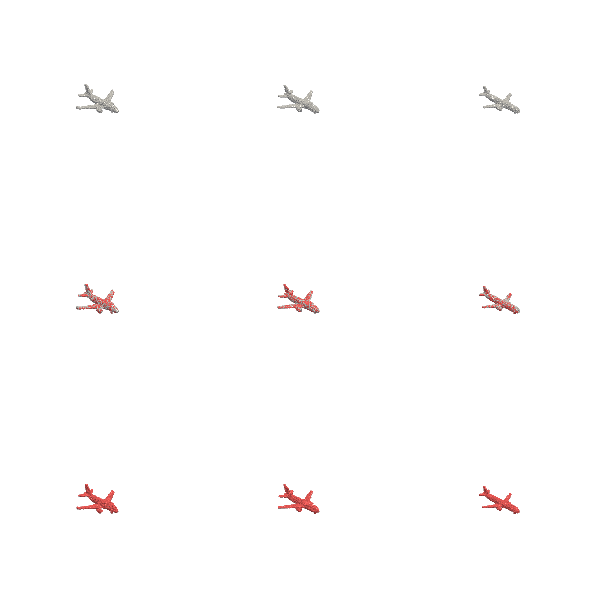

In [ ]:
# recon_pcs = torch.load(f'./results/encoder_airplane_normalized/reconstructions.pt').cpu().detach().squeeze().numpy()
# reference_pcs = torch.load(f'./results/encoder_airplane_normalized/references.pt').cpu().detach().squeeze().numpy()

# plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=3)


# # reference_pcs = scale*torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
# # plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc)

In [5]:
# import pyvista as pv
# import torch 
# from kaolin.metrics.pointcloud import chamfer_distance 

# pv.set_jupyter_backend("trame")
# recon = torch.load("./recon_sv.pt")
# batch = torch.load("./batch.pt")
# reference = torch.load("./results/encoder_car/references.pt")
# idx = 4

# ref = reference[0].cpu().numpy()
# bat = (batch[0]["train_points"].cpu() *batch[0]["std"]  + batch[0]["mean"])
# recon = (recon.cpu()*batch[0]["std"]  + batch[0]["mean"])


# print(recon.shape)
# print(bat.shape)
# print(chamfer_distance(bat.cuda(),recon.cuda()).mean()*10e4)

# p = pv.Plotter()
# # p.add_points(ref)
# p.add_points(bat.squeeze().cpu().numpy(),color="red")
# p.add_points(recon.squeeze().cpu().numpy(),color="green")

# p.show()

# pv.plot(recon[0]["sv_points"][0].cpu().numpy())



# Example Outputs

## Generation

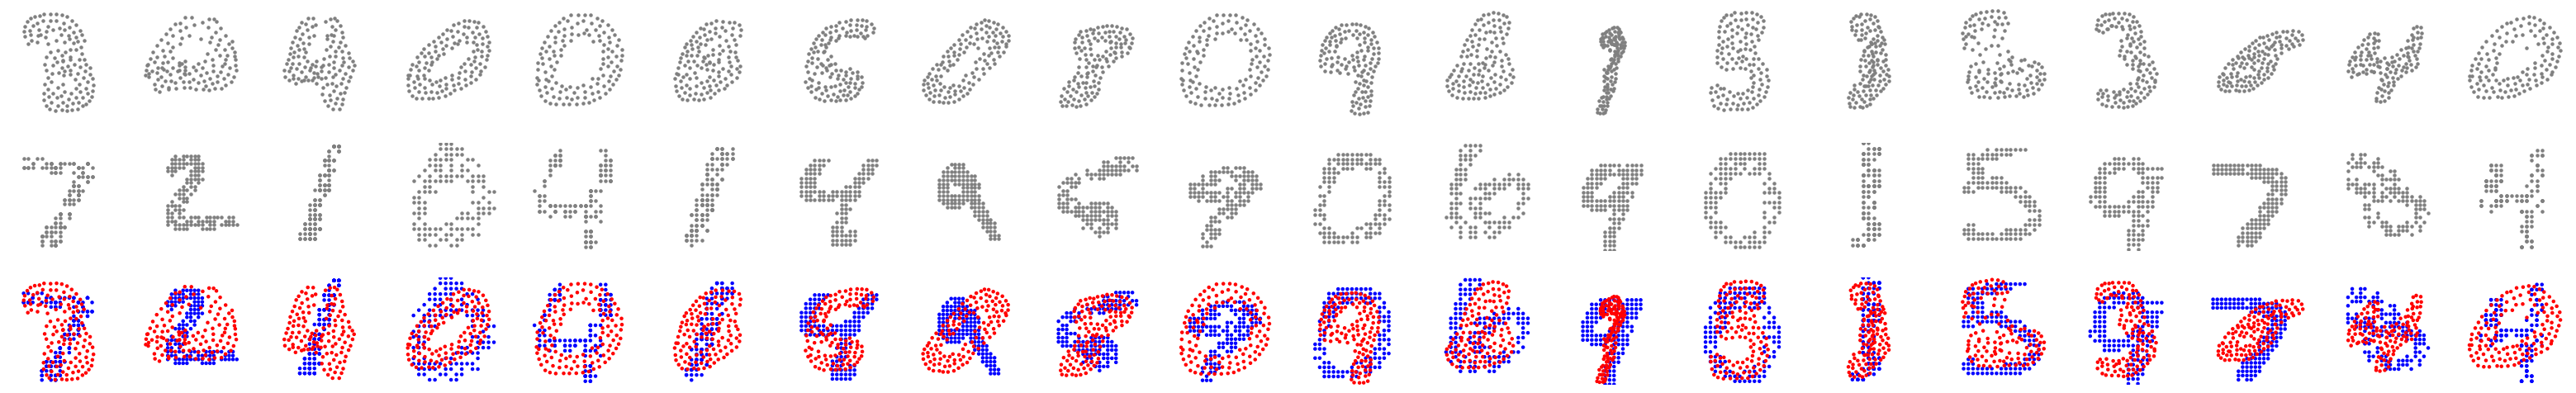

In [7]:
visualize_2d_genmodel("vae_mnist",num_pc=20)

In [8]:
visualize_3d_genmodel("vae_airplane",scale=10,num_pc=10,offset=0)

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9c8c52d330_1&reconnect=auto" class="pyvi…

In [9]:
visualize_3d_genmodel("vae_chair",scale=6,num_pc=10,offset=10)

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9c8c6828f0_2&reconnect=auto" class="pyvi…

In [10]:
visualize_3d_genmodel("vae_car",scale=6,num_pc=10,offset=20)

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9c46033a30_3&reconnect=auto" class="pyvi…

# Reconstruction

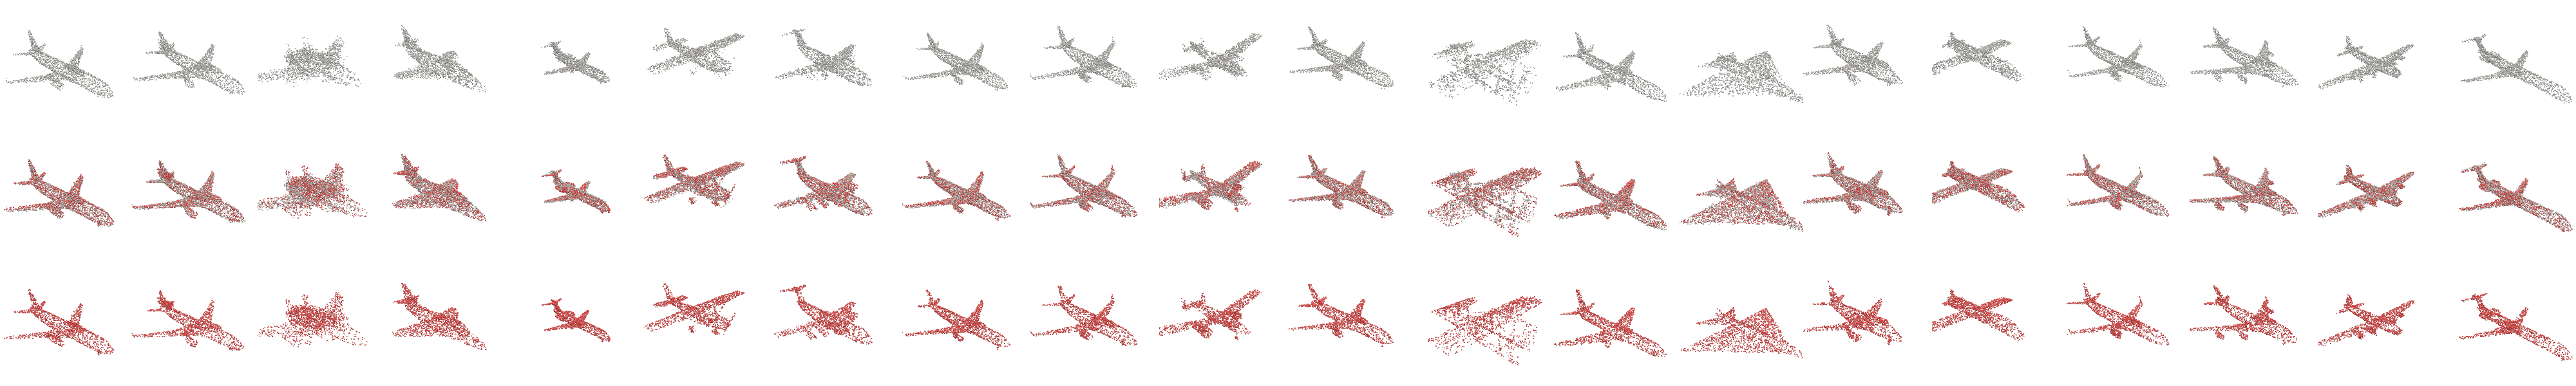

In [14]:
visualize_3d_model("encoder_airplane",scale=10,num_pc=20,offset=100)

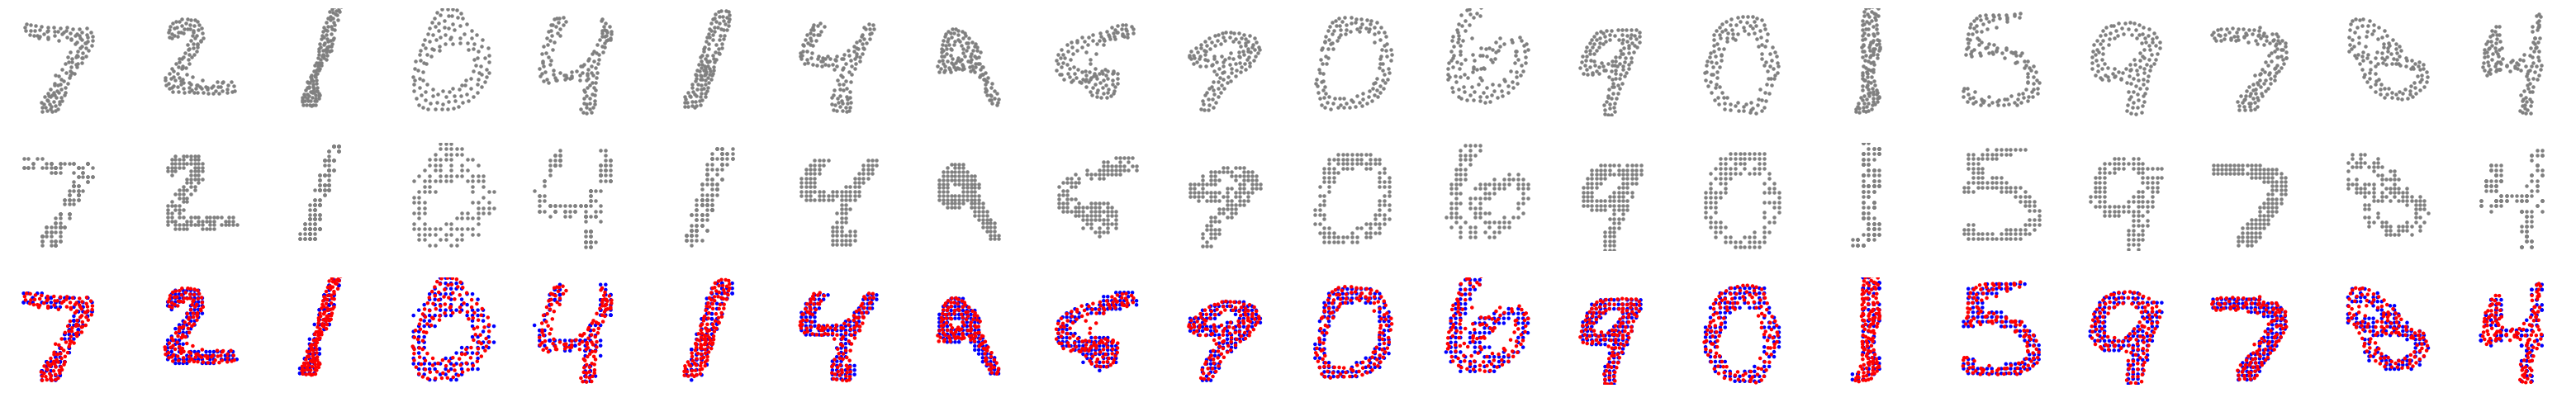

In [11]:
visualize_2d_model("encoder_mnist",num_pc=20)

In [12]:
visualize_3d_model("encoder_airplane",scale=10,num_pc=50)

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9c0a87aef0_4&reconnect=auto" class="pyvi…

In [13]:
visualize_3d_model("encoder_chair",scale=6,num_pc=10)

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9c46947fa0_5&reconnect=auto" class="pyvi…

In [14]:
visualize_3d_model("vae_car",scale=6,num_pc=20)

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9bfabd40a0_6&reconnect=auto" class="pyvi…

# Downsample

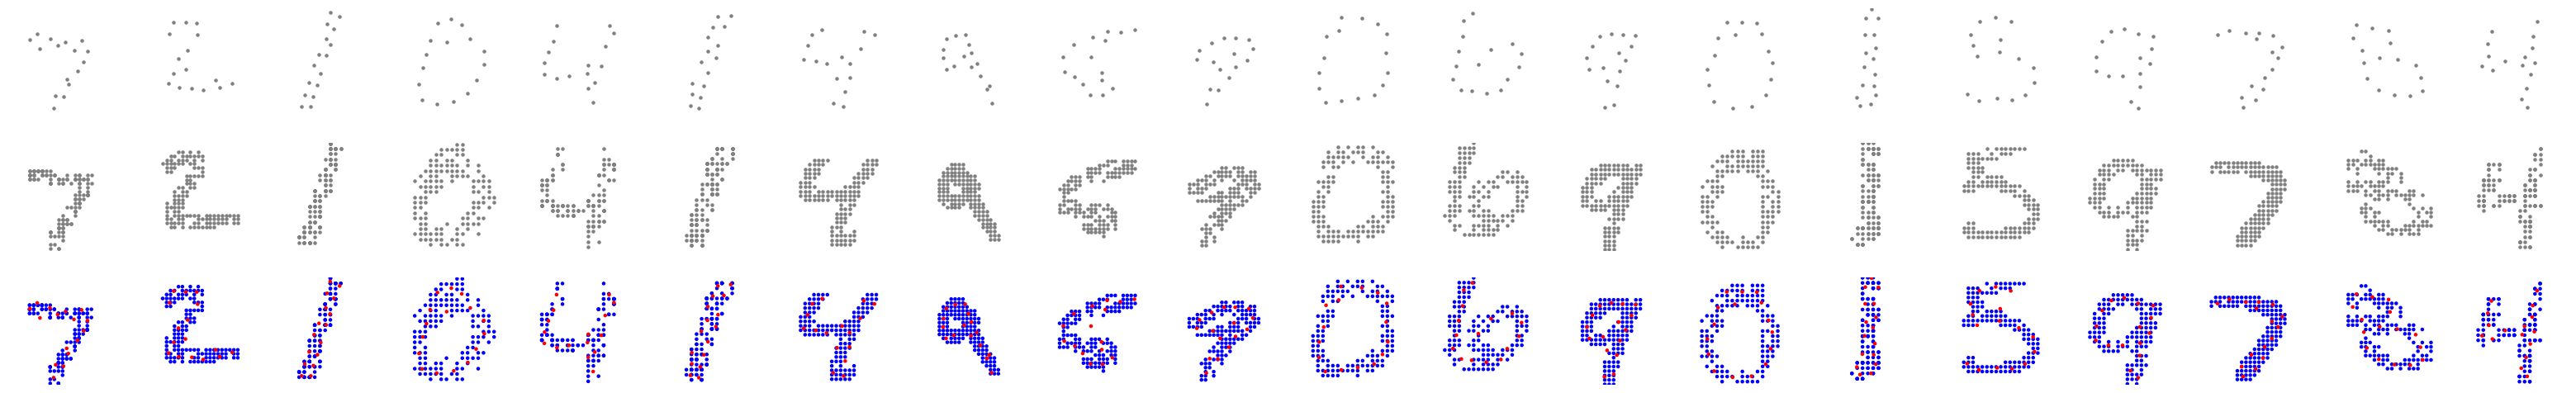

In [15]:
visualize_2d_model("encoder_downsample_mnist",num_pc=20)

In [16]:
visualize_3d_model("encoder_downsample_airplane",scale=10, num_pc=20)

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9bfac22890_7&reconnect=auto" class="pyvi…

In [17]:
visualize_3d_model("encoder_downsample_chair",scale=6, num_pc=20)

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9ba4cbd5a0_8&reconnect=auto" class="pyvi…

In [18]:
visualize_3d_model("encoder_downsample_car",scale=6, num_pc=20)

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9c46984130_9&reconnect=auto" class="pyvi…

# Upsample

In [19]:
def plot_rendered(cate,resolution,scale=1):
    recon_pcs = scale*torch.load(f'./results/rendered/reconstructions_{cate}_{resolution}.pt').cpu().detach().squeeze().numpy()
    reference_pcs = scale*torch.load(f'./results/rendered/references_{cate}_{resolution}.pt').cpu().detach().squeeze().numpy()
    plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs)

plot_rendered("airplane","64")
plot_rendered("airplane","128")
plot_rendered("airplane","256")

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9c460669b0_10&reconnect=auto" class="pyv…

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9c461f5c90_11&reconnect=auto" class="pyv…

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9c461f4880_12&reconnect=auto" class="pyv…

# Downsample Airplane

In [20]:
visualize_3d_model("encoder_downsample_airplane",scale=10)

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9c461f68f0_13&reconnect=auto" class="pyv…

In [21]:
visualize_3d_model("encoder_downsample_car",scale=5)

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9c46065300_14&reconnect=auto" class="pyv…

In [22]:
visualize_3d_model("encoder_downsample_chair",scale=5)

Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9c46bf6ad0_15&reconnect=auto" class="pyv…

# Render

In [23]:
def visualize_3d_model(model,scale=1.0,num_pc:int=5):
    recon_pcs = scale*torch.load(f'./results/rendered_ect/{model}/reconstructions.pt').cpu().detach().squeeze().numpy()
    reference_pcs = scale*torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc)


In [24]:


scale = 6.0
num_pc = 20

recon_pcs = scale*torch.load(f'./results/rendered_ect/car/128_128_car_reconstructions.pt').cpu().detach().squeeze().numpy()
reference_pcs = scale*torch.load(f'./results/rendered_ect/car/references.pt').cpu().detach().squeeze().numpy()
plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc)


Widget(value='<iframe src="http://localhost:35983/index.html?ui=P_0x7f9c46bf6230_16&reconnect=auto" class="pyv…